## Library Loading

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import os
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [3]:
os.listdir("input")

['dataset.txt']

## Data Loading

In [4]:
data=pd.read_csv("input/dataset.txt")

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,13.583,13.693,13.430,13.693,156240,0
1,2005-02-28,13.697,13.827,13.540,13.827,370509,0
2,2005-03-01,13.780,13.913,13.720,13.760,224484,0
3,2005-03-02,13.717,13.823,13.667,13.810,286431,0
4,2005-03-03,13.783,13.783,13.587,13.630,193824,0


## Data Visualization

In [6]:
data['Date']=pd.to_datetime(data['Date'])

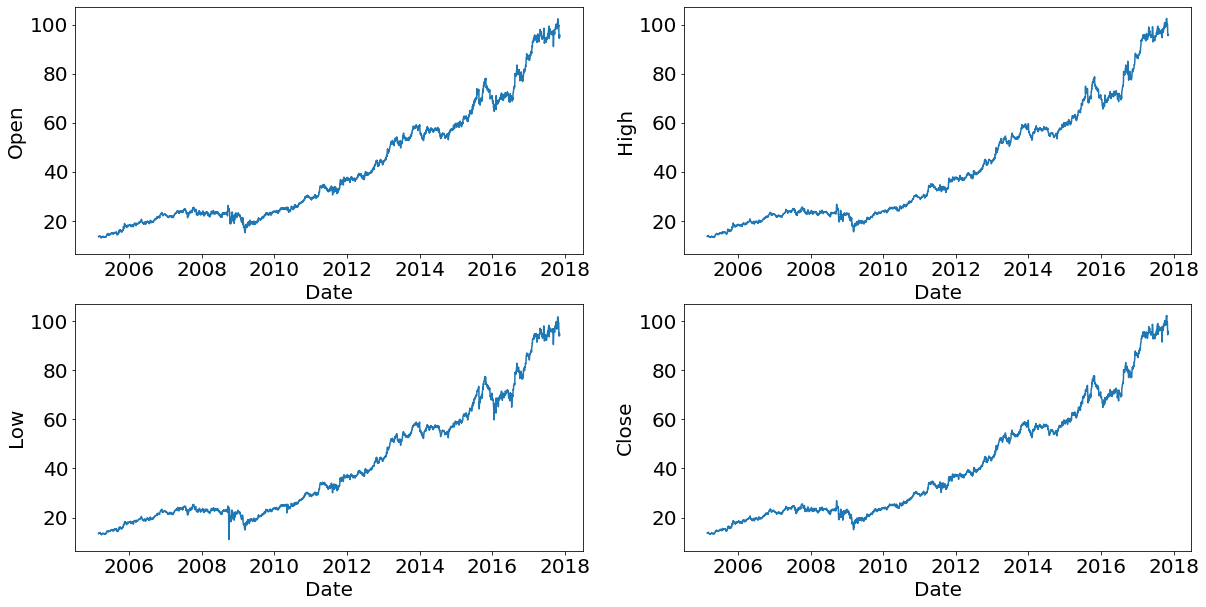

In [7]:
rcParams['figure.figsize'] =(20,10)
rcParams['font.size']=20
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1 = sns.lineplot(x="Date", y="Open",markers=True, dashes=False,data=data)
ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1)
ax2 = sns.lineplot(x="Date", y="High",markers=True, dashes=False, data=data)
ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
ax3 = sns.lineplot(x="Date", y="Low",markers=True, dashes=False, data=data)
ax4 = fig.add_subplot(224, sharex=ax1, sharey=ax1)
ax4 = sns.lineplot(x="Date", y="Close",markers=True, dashes=False, data=data)

## Data Preprocessing

In [8]:
plt.rcParams.update({"figure.figsize":(20,10)}) 
plt.rcParams.update({"font.size":20})

In [9]:
df=data[['Date','Open','High','Low','Close']]
df=df.set_index('Date')

In [10]:
df.head(10)

,Open,High,Low,Close
Date,,,,
2005-02-25,13.583,13.693,13.430,13.693
2005-02-28,13.697,13.827,13.540,13.827
2005-03-01,13.780,13.913,13.720,13.760
2005-03-02,13.717,13.823,13.667,13.810
2005-03-03,13.783,13.783,13.587,13.630
2005-03-04,13.700,13.903,13.620,13.903
2005-03-07,13.917,14.053,13.897,13.987
2005-03-08,13.987,14.067,13.873,13.890
2005-03-09,13.930,13.960,13.813,13.817


In [11]:
df_close = df[['Close']]

In [12]:
df_close

,Close
Date,
2005-02-25,13.693
2005-02-28,13.827
2005-03-01,13.760
2005-03-02,13.810
2005-03-03,13.630
...,...
2017-11-06,95.550
2017-11-07,95.560
2017-11-08,95.450


## Autoregressive Integrated Moving Average (ARIMA) Model

In [13]:
# 1,1,2 ARIMA Model
df_close.index = pd.DatetimeIndex(df_close.index).to_period('M')
model = ARIMA(df_close, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [1]:
tmodel_fit.plot_predict(dynamic=False)
plt.show()

NameError: name 'model_fit' is not defined

## Data Splitting

In [15]:
print(3201*0.8)
print(3201*0.2)

2560.8
640.2


In [16]:
train_data=df_close[:2560]
test_data=df_close[2560:]

In [17]:
train_data.head()

,Close
Date,
2005-02,13.693
2005-02,13.827
2005-03,13.760
2005-03,13.810
2005-03,13.630


In [18]:
train_data.shape

(2560, 1)

In [19]:
test_data.head()

,Close
Date,
2015-04,60.68
2015-05,61.19
2015-05,61.63
2015-05,61.46
2015-05,61.71


In [20]:
test_data.shape

(641, 1)

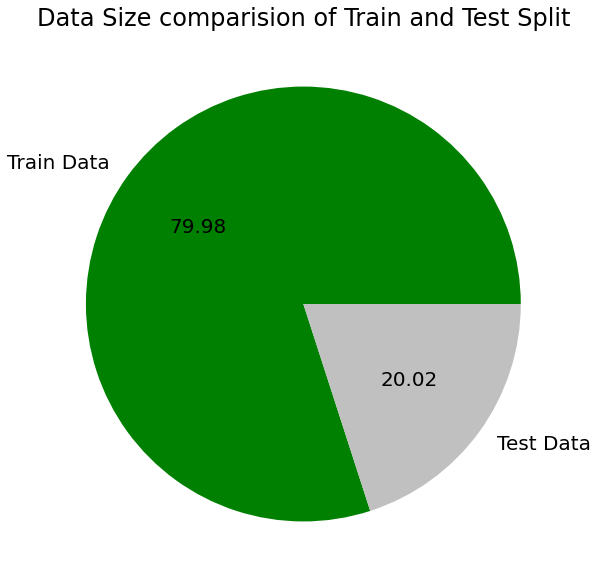

In [21]:
plt.figure(figsize=(10,10))
plt.rcParams["font.size"]=20
plt.pie(x=[train_data.shape[0],test_data.shape[0]],labels=["Train Data","Test Data"],colors=["green","silver"],autopct="%.2f")
plt.title(label="Data Size comparision of Train and Test Split")
plt.show()

In [22]:
train_data=train_data.to_timestamp()
test_data=test_data.to_timestamp()

In [23]:
train_data.index = pd.DatetimeIndex(train_data.index).to_period('M')
test_data.index = pd.DatetimeIndex(test_data.index).to_period('M')

In [24]:
a=train_data.to_timestamp()

In [25]:
print(a)

             Close
Date              
2005-02-01  13.693
2005-02-01  13.827
2005-03-01  13.760
2005-03-01  13.810
2005-03-01  13.630
...            ...
2015-04-01  61.260
2015-04-01  61.235
2015-04-01  60.750
2015-04-01  61.030
2015-04-01  60.740

[2560 rows x 1 columns]


In [26]:
train_data.index

PeriodIndex(['2005-02', '2005-02', '2005-03', '2005-03', '2005-03', '2005-03',
             '2005-03', '2005-03', '2005-03', '2005-03',
             ...
             '2015-04', '2015-04', '2015-04', '2015-04', '2015-04', '2015-04',
             '2015-04', '2015-04', '2015-04', '2015-04'],
            dtype='period[M]', name='Date', length=2560)

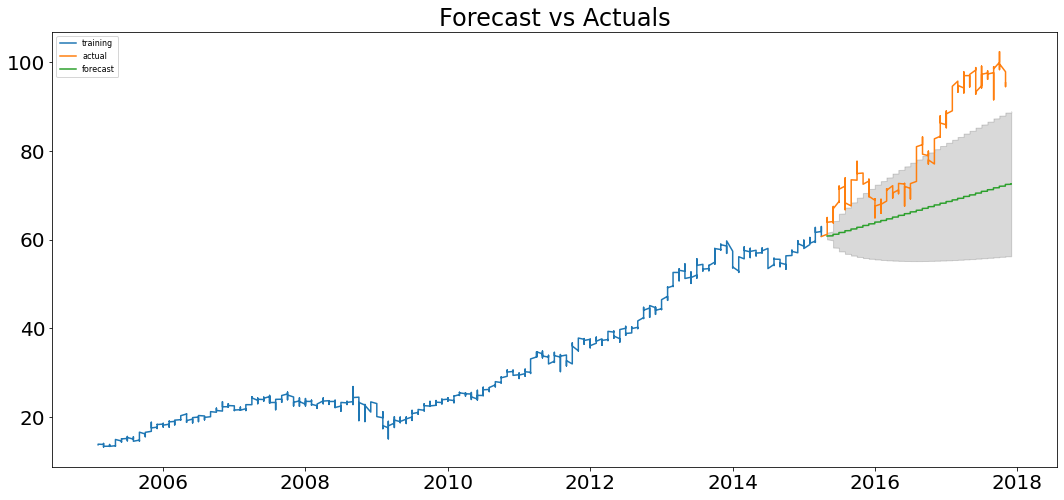

In [27]:
# Build Model  
model = ARIMA(train_data, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(641, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(18,8))
plt.plot(train_data.to_timestamp(), label='training')
plt.plot(test_data.to_timestamp(), label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
from sklearn import metrics
def forecast_accuracy(y_test, y_pred):
    print('Mean Error:', np.mean(y_pred-y_test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
forecast_accuracy(test_data.values,fc)

Mean Error: -13.601693963229868
Mean Absolute Error: 13.60204654792345
Root Mean Squared Error: 16.17435600431158



## Model Saving

In [29]:
model_fit.save('ArimaModel/Arima_model.pkl')

## Thank You